In [ ]:
# Магістерський Диплом Студента КНСШ-23 Черещука Любомира

In [ ]:
# load needed libs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
# get data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
# get data set descriptive statistic info
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
# get number of unique values for eaach column
df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
# check if we have null values in data set
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# plot features distribution

# plot gender, heart_disease, hypertension features
fig = make_subplots(rows=1, cols=3, subplot_titles=['gender', 'heart_disease', 'hypertension'])
fig.add_trace(go.Histogram(x=df["gender"]), row=1, col=1)
fig.add_trace(go.Histogram(x=df["heart_disease"]), row=1, col=2)
fig.add_trace(go.Histogram(x=df["hypertension"]), row=1, col=3)
fig.update_layout(showlegend=False, yaxis_title='Count', title_text="Features Distribution", bargap = 0.05)
fig.show();

# plot ever_married, work_type, Residence_type features
fig = make_subplots(rows=1, cols=3, subplot_titles=['ever_married', 'work_type', 'Residence_type'])
fig.add_trace(go.Histogram(x=df["ever_married"]), row=1, col=1)
fig.add_trace(go.Histogram(x=df["work_type"]), row=1, col=2)
fig.add_trace(go.Histogram(x=df["Residence_type"]), row=1, col=3)
fig.update_layout(showlegend=False, yaxis_title='Count', title_text="Features Distribution", bargap = 0.05)
fig.show();

# plot age, avg_glucose_level features
fig = make_subplots(rows=1, cols=2, subplot_titles=['age', 'avg_glucose_level'])
fig.add_trace(go.Histogram(x=df["age"]), row=1, col=1)
fig.add_trace(go.Histogram(x=df["avg_glucose_level"]), row=1, col=2)
fig.update_layout(showlegend=False, yaxis_title='Count', title_text="Features Distribution", bargap = 0.05)
fig.show();

# plot bmi, smoking_status features
fig = make_subplots(rows=1, cols=2, subplot_titles=['bmi', 'smoking_status'])
fig.add_trace(go.Histogram(x=df["bmi"]), row=1, col=1)
fig.add_trace(go.Histogram(x=df["smoking_status"]), row=1, col=2)
fig.update_layout(showlegend=False, yaxis_title='Count', title_text="Features Distribution", bargap = 0.05)
fig.show();

In [ ]:
# plot stroke historgam
fig = px.histogram(df, x="stroke")
fig.update_layout(autosize=True, width=700, height=500, bargap=0.05)
fig.show();

In [ ]:
# plot feature histrograms by stroke

for column in df.columns:
    if column == 'stroke':
        continue

    fig = px.histogram(df, x=column, color='stroke')
    fig.update_layout(title=f'Histogram for {column} by stroke', xaxis_title=column, yaxis_title='Count')
    fig.show()

In [ ]:
# plot box plot for numerical features avg_glucose_level, bmi

fig = make_subplots(rows=2, cols=1, subplot_titles=("Avg Glucose Level", "Body Mass Index" ))
fig.add_trace(go.Box(x=df["avg_glucose_level"]), row=1, col=1)
fig.add_trace(go.Box(x=df["bmi"]), row=2, col=1)
fig.update_layout(showlegend=False, title_text="Numerical BoxPlot", height=500)

In [ ]:
# plot scatter for bmi and avg_glucose_level to see outleirs
fig = px.scatter(df[df["stroke"]==1], x="bmi", y="avg_glucose_level")
fig.show()

In [ ]:
# method for removing outleirs
def remove_outliers(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

lower_bmi , upper_bmi = remove_outliers(df["bmi"])
lower_glu , upper_glu = remove_outliers(df["avg_glucose_level"])

In [ ]:
# remove outliers
df["bmi"] = df["bmi"].apply(lambda x: np.mean(df["bmi"]) if x > upper_bmi or x < lower_bmi else x)
df["avg_glucose_level"] = df["avg_glucose_level"].apply(lambda x: np.mean(df["avg_glucose_level"]) if x > upper_glu or x < lower_glu else x)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,105.943562,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.920000,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,105.943562,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,105.943562,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,105.943562,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.150000,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,105.943562,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.020000,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.940000,30.0,smokes,0


In [ ]:
# plot box plot for numerical features avg_glucose_level, bmi after removing outleirs

fig = make_subplots(rows=2, cols=1, subplot_titles=("Avg Glucose Level" , "Body Mass Index"))
fig.add_trace(go.Box(x=df["avg_glucose_level"]), row=1, col=1)
fig.add_trace(go.Box(x=df["bmi"]), row=2, col=1)
fig.update_layout(showlegend=False, title_text="Numerical BoxPlot", height=500)

In [ ]:
# plot scatter for bmi and avg_glucose_level after removing outleirs
fig = px.scatter(df[df["stroke"]==1], x="bmi", y="avg_glucose_level")
fig.show()

In [ ]:
# change gender values to male=1 and female=0
gndr_col = pd.get_dummies(df["gender"])
gndr_col = gndr_col.drop(['Female'], axis=1)

# change ever_married values to Yes=1 and No=0
mrd_col = pd.get_dummies(df["ever_married"])
mrd_col = mrd_col.drop(['No'], axis=1)

# change residence_type values to urban=1 and rural=0
urbn_col = pd.get_dummies(df["Residence_type"])
urbn_col = urbn_col.drop(['Rural'], axis=1)

# build dataset
df = pd.concat((df, gndr_col, mrd_col, urbn_col), axis=1)
df = df.drop(['gender', 'ever_married', 'Residence_type'], axis=1)
df = df.rename(columns={'Male': 'gender', 'Yes': 'ever_married'})
df.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender,ever_married,Urban
0,67.0,0,1,Private,105.943562,36.6,formerly smoked,1,1,1,1
1,80.0,0,1,Private,105.920000,32.5,never smoked,1,1,1,0
2,49.0,0,0,Private,105.943562,34.4,smokes,1,0,1,1
3,79.0,1,0,Self-employed,105.943562,24.0,never smoked,1,0,1,0
4,81.0,0,0,Private,105.943562,29.0,formerly smoked,1,1,1,1


In [ ]:
# One-Hot Encoding to convert work_type and smoking_status
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,Urban,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,105.943562,36.6,1,1,1,1,1,0,0,1,0,0
1,80.0,0,1,105.920000,32.5,1,1,1,0,1,0,0,0,1,0
2,49.0,0,0,105.943562,34.4,1,0,1,1,1,0,0,0,0,1
3,79.0,1,0,105.943562,24.0,1,0,1,0,0,1,0,0,1,0
4,81.0,0,0,105.943562,29.0,1,1,1,1,1,0,0,1,0,0


In [ ]:
# scaling data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = ['age', 'avg_glucose_level', 'bmi']
df[columns] = scaler.fit_transform(df[columns])
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,Urban,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0,1,0.447548,0.708464,1,1,1,1,1,0,0,1,0,0
1,0.975586,0,1,0.447341,0.579937,1,1,1,0,1,0,0,0,1,0
2,0.597168,0,0,0.447548,0.639498,1,0,1,1,1,0,0,0,0,1
3,0.963379,1,0,0.447548,0.313480,1,0,1,0,0,1,0,0,1,0
4,0.987793,0,0,0.447548,0.470219,1,1,1,1,1,0,0,1,0,0


In [ ]:
df.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [ ]:
# use SMOTE for fixing imbalancing of data
from imblearn.over_sampling import SMOTE

x = df.drop('stroke', axis=1)
y = df['stroke'].astype('int')

oversampling = SMOTE(sampling_strategy=0.5)
x, y = oversampling.fit_resample(x, y)

x_df = pd.DataFrame(x)
y_df = pd.DataFrame(y, columns=['stroke'])
df = pd.concat([x_df, y_df], axis=1)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,Urban,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0.816895,0,1,0.447548,0.708464,1,1,1,1,0,0,1,0,0,1
1,0.975586,0,1,0.447341,0.579937,1,1,0,1,0,0,0,1,0,1
2,0.597168,0,0,0.447548,0.639498,0,1,1,1,0,0,0,0,1,1
3,0.963379,1,0,0.447548,0.313480,0,1,0,0,1,0,0,1,0,1
4,0.987793,0,0,0.447548,0.470219,1,1,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7094,0.875809,0,0,0.266087,0.324420,0,1,0,1,0,0,0,1,0,1
7095,0.848749,0,0,0.447548,0.548010,1,1,1,1,0,0,1,0,0,1
7096,0.658156,1,0,0.460335,0.461751,0,1,1,0,1,0,0,1,0,1
7097,0.647527,1,0,0.398602,0.729070,1,1,1,0,0,0,1,0,0,1


In [ ]:
df.stroke.value_counts()

0    4733
1    2366
Name: stroke, dtype: int64

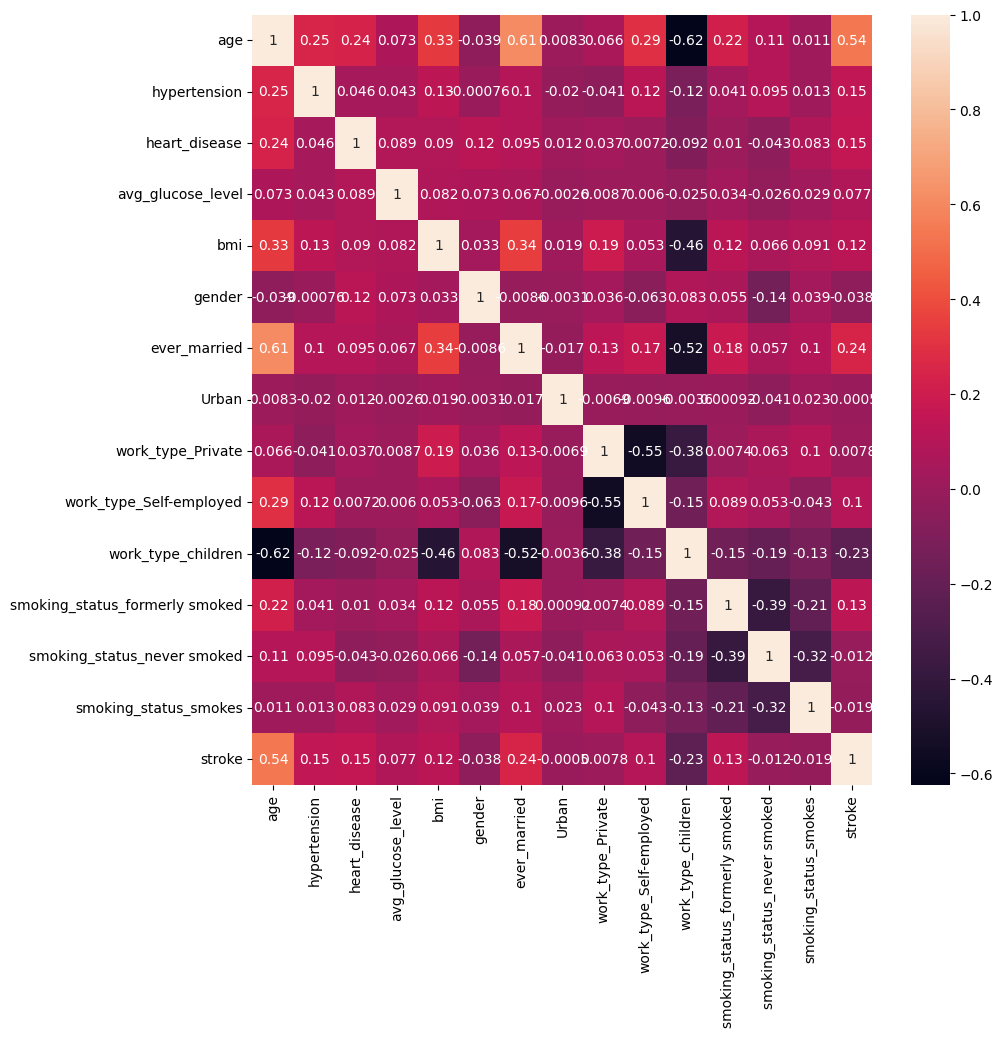

In [ ]:
# plot corr map
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# get target(y) and features(x)
x = df.drop('stroke', axis=1)
y = df.stroke

In [ ]:
# splitting data to train and test 80% to 20%
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (5679, 14)
y_train shape: (5679,)
x_test shape: (1420, 14)
y_test shape: (1420,)


In [ ]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# StackingClassifier with RandomForestClassifier, LinearSVC and LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# metrics for model validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Accuracy score:  0.8711267605633802
Precision score:  0.7995951417004049
Recall:  0.824634655532359
F1-Score:  0.8119218910585818
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       926
           1       0.82      0.80      0.81       494

    accuracy                           0.87      1420
   macro avg       0.86      0.85      0.86      1420
weighted avg       0.87      0.87      0.87      1420



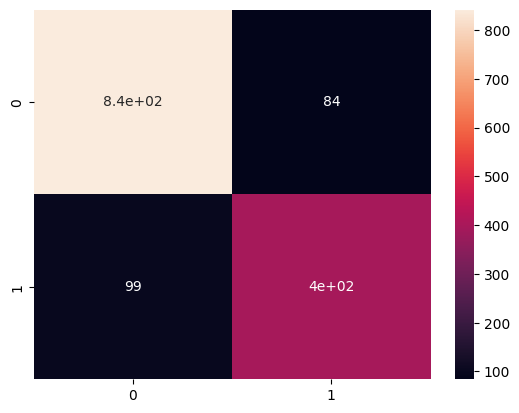

In [ ]:
# base DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(x_train, y_train)
decision_tree_classifier_prediction = decision_tree_classifier.predict(x_test)

# print metrics and classification report
print('Accuracy score: ', (accuracy_score(y_test, decision_tree_classifier_prediction)))
print('Precision score: ', precision_score(y_test, decision_tree_classifier_prediction))
print('Recall: ', recall_score(y_test, decision_tree_classifier_prediction))
print('F1-Score: ', f1_score(y_test, decision_tree_classifier_prediction))
print('Classification report: \n', classification_report(decision_tree_classifier_prediction, y_test))

# show confusion_matrix
sns.heatmap(confusion_matrix(decision_tree_classifier_prediction, y_test), annot=True)
plt.show()

In [ ]:
# GridSearch for DecisionTreeClassifier
param_grid_for_decision_tree_classifier = {
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 30, 50],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# do grid search
grid_search = GridSearchCV(decision_tree_classifier, param_grid=param_grid_for_decision_tree_classifier, cv=10, scoring='recall')
grid_search.fit(x_train, y_train)

# print best hyperparameters for DecisionTreeClassifier
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'log_loss', 'max_depth': 10, 'min_samples_split': 4, 'splitter': 'best'}
0.862751885624226


Accuracy score:  0.8711267605633802
Precision score:  0.7995951417004049
Recall:  0.824634655532359
F1-Score:  0.8119218910585818
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       926
           1       0.82      0.80      0.81       494

    accuracy                           0.87      1420
   macro avg       0.86      0.85      0.86      1420
weighted avg       0.87      0.87      0.87      1420



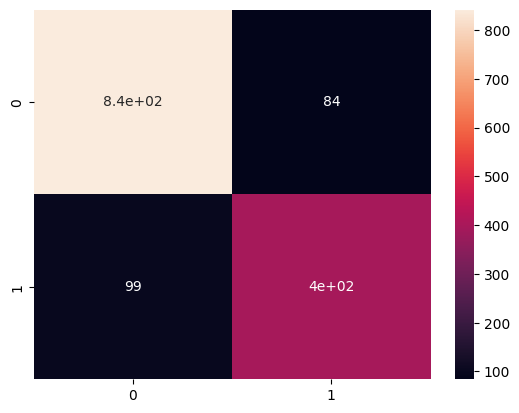

In [ ]:
# build DecisionTreeClassifier with grid search best params
grid_decision_tree_classifier = DecisionTreeClassifier(criterion='log_loss', max_depth=10, min_samples_split=4, splitter='best')
grid_decision_tree_classifier.fit(x_train, y_train)
grid_decision_tree_classifier_prediction = decision_tree_classifier.predict(x_test)

# print metrics and classification report
print('Accuracy score: ', (accuracy_score(y_test, grid_decision_tree_classifier_prediction)))
print('Precision score: ', precision_score(y_test, grid_decision_tree_classifier_prediction))
print('Recall: ', recall_score(y_test, grid_decision_tree_classifier_prediction))
print('F1-Score: ', f1_score(y_test, grid_decision_tree_classifier_prediction))
print('Classification report: \n', classification_report(grid_decision_tree_classifier_prediction, y_test))

# show confusion_matrix
sns.heatmap(confusion_matrix(grid_decision_tree_classifier_prediction, y_test), annot=True)
plt.show()

Accuracy score:  0.9091549295774648
Precision score:  0.8586065573770492
Recall:  0.8747390396659708
F1-Score:  0.8665977249224407
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       932
           1       0.87      0.86      0.87       488

    accuracy                           0.91      1420
   macro avg       0.90      0.90      0.90      1420
weighted avg       0.91      0.91      0.91      1420



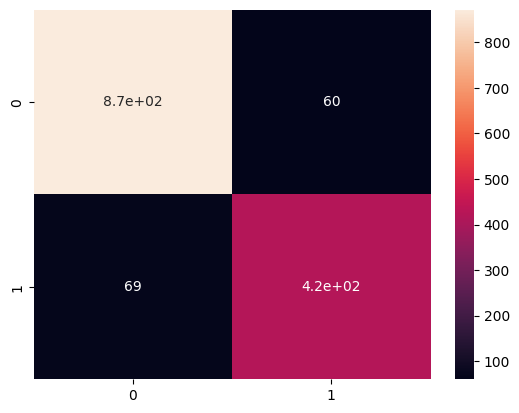

In [ ]:
# base RandomForestClassifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_train, y_train)
random_forest_classifier_prediction = random_forest_classifier.predict(x_test)

# print metrics and classification report
print('Accuracy score: ', (accuracy_score(y_test, random_forest_classifier_prediction)))
print('Precision score: ', precision_score(y_test, random_forest_classifier_prediction))
print('Recall: ', recall_score(y_test, random_forest_classifier_prediction))
print('F1-Score: ', f1_score(y_test, random_forest_classifier_prediction))
print('Classification report: \n', classification_report(random_forest_classifier_prediction, y_test))

# show confusion_matrix
sns.heatmap(confusion_matrix(random_forest_classifier_prediction, y_test), annot=True)
plt.show()

In [ ]:
# GridSearch for RandomForestClassifier
param_grid_for_random_forest_classifier = {
    'n_estimators': [50, 150, 300, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 30, 50]
}

# do grid search
grid_search = GridSearchCV(random_forest_classifier, param_grid=param_grid_for_random_forest_classifier, cv=10, scoring='recall')
grid_search.fit(x_train, y_train)

# print best hyperparameters for RandomForestClassifier
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 500}
0.8807863334459078


Accuracy score:  0.9147887323943662
Precision score:  0.8608870967741935
Recall:  0.8914405010438413
F1-Score:  0.8758974358974358
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       924
           1       0.89      0.86      0.88       496

    accuracy                           0.91      1420
   macro avg       0.91      0.90      0.91      1420
weighted avg       0.91      0.91      0.91      1420



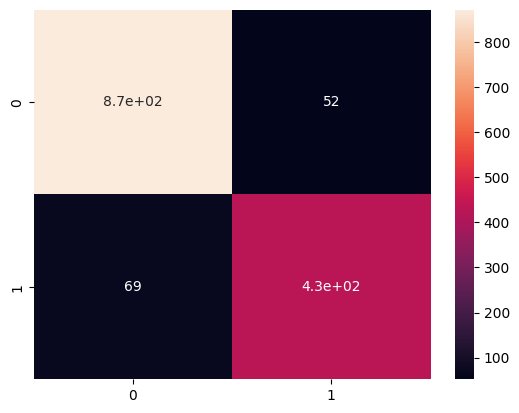

In [ ]:
# build RandomForestClassifier with grid search best params
grid_random_forest_classifier = RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=500)
grid_random_forest_classifier.fit(x_train, y_train)
grid_random_forest_classifier_prediction = grid_random_forest_classifier.predict(x_test)

# print metrics and classification report
print('Accuracy score: ', (accuracy_score(y_test, grid_random_forest_classifier_prediction)))
print('Precision score: ', precision_score(y_test, grid_random_forest_classifier_prediction))
print('Recall: ', recall_score(y_test, grid_random_forest_classifier_prediction))
print('F1-Score: ', f1_score(y_test, grid_random_forest_classifier_prediction))
print('Classification report: \n', classification_report(grid_random_forest_classifier_prediction, y_test))

# show confusion_matrix
sns.heatmap(confusion_matrix(grid_random_forest_classifier_prediction, y_test), annot=True)
plt.show()

Accuracy score:  0.8697183098591549
Precision score:  0.75
Recall:  0.9206680584551148
F1-Score:  0.8266166822867854
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.90       832
           1       0.92      0.75      0.83       588

    accuracy                           0.87      1420
   macro avg       0.88      0.85      0.86      1420
weighted avg       0.88      0.87      0.87      1420



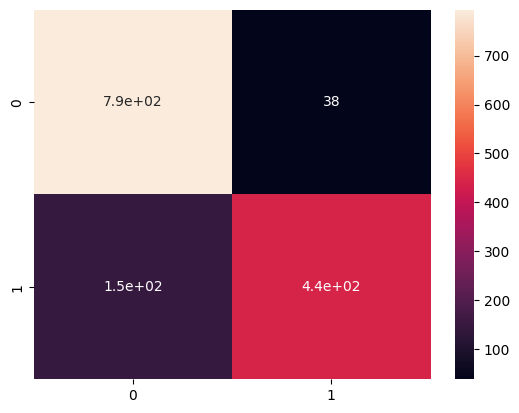

In [ ]:
# base KNeighborsClassifier
k_neighbors_classifier = KNeighborsClassifier()
k_neighbors_classifier.fit(x_train, y_train)
k_neighbors_classifier_prediction = k_neighbors_classifier.predict(x_test)

# print metrics and classification report
print('Accuracy score: ', (accuracy_score(y_test, k_neighbors_classifier_prediction)))
print('Precision score: ', precision_score(y_test, k_neighbors_classifier_prediction))
print('Recall: ', recall_score(y_test, k_neighbors_classifier_prediction))
print('F1-Score: ', f1_score(y_test, k_neighbors_classifier_prediction))
print('Classification report: \n', classification_report(k_neighbors_classifier_prediction, y_test))

# show confusion_matrix
sns.heatmap(confusion_matrix(k_neighbors_classifier_prediction, y_test), annot=True)
plt.show()

In [ ]:
# GridSearch for KNeighborsClassifier
param_grid_for_k_neighbors_classifier = {
    'n_neighbors': [3, 5, 8, 10],
    'weights': ['uniform','distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

# do grid search
grid_search = GridSearchCV(k_neighbors_classifier, param_grid=param_grid_for_k_neighbors_classifier, cv=10, scoring='recall')
grid_search.fit(x_train, y_train)

# print best hyperparameters for KNeighborsClassifier
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
0.9226190476190477


Accuracy score:  0.8760563380281691
Precision score:  0.7546218487394958
Recall:  0.9373695198329853
F1-Score:  0.8361266294227188
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       825
           1       0.94      0.75      0.84       595

    accuracy                           0.88      1420
   macro avg       0.89      0.86      0.87      1420
weighted avg       0.88      0.88      0.87      1420



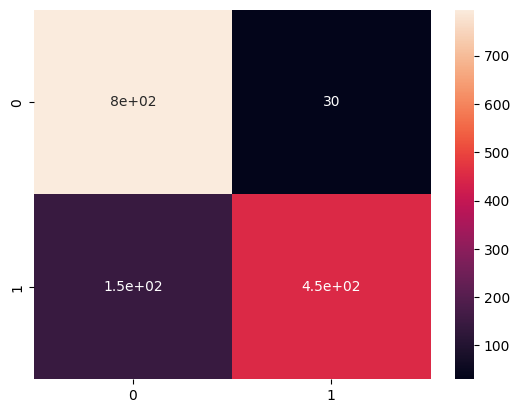

In [ ]:
# build KNeighborsClassifier with grid search best params
grid_k_neighbors_classifier = KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors=8, weights='distance')
grid_k_neighbors_classifier.fit(x_train, y_train)
grid_k_neighbors_classifier_prediction = grid_k_neighbors_classifier.predict(x_test)

# print metrics and classification report
print('Accuracy score: ', (accuracy_score(y_test, grid_k_neighbors_classifier_prediction)))
print('Precision score: ', precision_score(y_test, grid_k_neighbors_classifier_prediction))
print('Recall: ', recall_score(y_test, grid_k_neighbors_classifier_prediction))
print('F1-Score: ', f1_score(y_test, grid_k_neighbors_classifier_prediction))
print('Classification report: \n', classification_report(grid_k_neighbors_classifier_prediction, y_test))

# show confusion_matrix
sns.heatmap(confusion_matrix(grid_k_neighbors_classifier_prediction, y_test), annot=True)
plt.show()

Accuracy score:  0.7915492957746478
Precision score:  0.6769825918762089
Recall:  0.7306889352818372
F1-Score:  0.7028112449799196
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       903
           1       0.73      0.68      0.70       517

    accuracy                           0.79      1420
   macro avg       0.78      0.77      0.77      1420
weighted avg       0.79      0.79      0.79      1420



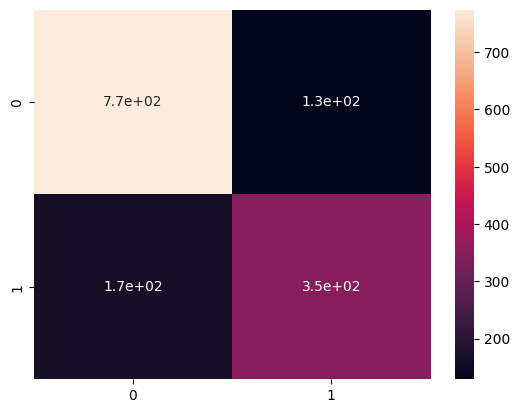

In [ ]:
# base AdaBoostClassifier
ada_boost_classifier = AdaBoostClassifier()
ada_boost_classifier.fit(x_train, y_train)
ada_boost_classifier_prediction = ada_boost_classifier.predict(x_test)

# print metrics and classification report
print('Accuracy score: ', (accuracy_score(y_test, ada_boost_classifier_prediction)))
print('Precision score: ', precision_score(y_test, ada_boost_classifier_prediction))
print('Recall: ', recall_score(y_test, ada_boost_classifier_prediction))
print('F1-Score: ', f1_score(y_test, ada_boost_classifier_prediction))
print('Classification report: \n', classification_report(ada_boost_classifier_prediction, y_test))

# show confusion_matrix
sns.heatmap(confusion_matrix(ada_boost_classifier_prediction, y_test), annot=True)
plt.show()

In [ ]:
# GridSearch for AdaBoostClassifier
param_grid_for_ada_boost_classifier = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1), RandomForestClassifier(max_depth=1)],
    'n_estimators': [50, 150, 300, 500],
    'learning_rate': [1.0, 0.1, 0.01]
}

# do grid search
grid_search = GridSearchCV(ada_boost_classifier, param_grid=param_grid_for_ada_boost_classifier, cv=10, scoring='recall')
grid_search.fit(x_train, y_train)

# print best hyperparameters for AdaBoostClassifier
print(grid_search.best_params_)
print(grid_search.best_score_)

{'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 50}
0.856889564336373


Accuracy score:  0.7619718309859155
Precision score:  0.6053811659192825
Recall:  0.8455114822546973
F1-Score:  0.7055749128919859
Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       751
           1       0.85      0.61      0.71       669

    accuracy                           0.76      1420
   macro avg       0.78      0.75      0.75      1420
weighted avg       0.78      0.76      0.76      1420



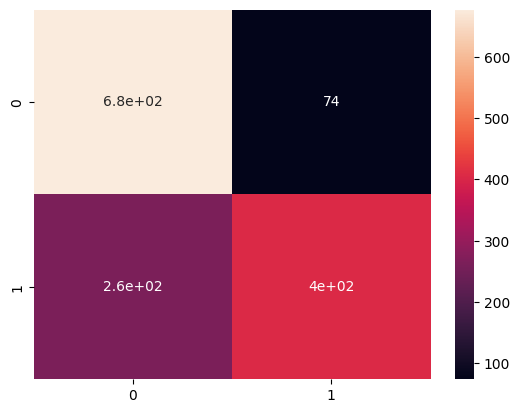

In [ ]:
# build AdaBoostClassifier with grid search best params
grid_ada_boost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50)
grid_ada_boost_classifier.fit(x_train, y_train)
grid_ada_boost_classifier_prediction = grid_ada_boost_classifier.predict(x_test)

# print metrics and classification report
print('Accuracy score: ', (accuracy_score(y_test, grid_ada_boost_classifier_prediction)))
print('Precision score: ', precision_score(y_test, grid_ada_boost_classifier_prediction))
print('Recall: ', recall_score(y_test, grid_ada_boost_classifier_prediction))
print('F1-Score: ', f1_score(y_test, grid_ada_boost_classifier_prediction))
print('Classification report: \n', classification_report(grid_ada_boost_classifier_prediction, y_test))

# show confusion_matrix
sns.heatmap(confusion_matrix(grid_ada_boost_classifier_prediction, y_test), annot=True)
plt.show()

Accuracy score:  0.9154929577464789
Precision score:  0.881104033970276
Recall:  0.8663883089770354
F1-Score:  0.8736842105263158
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       949
           1       0.87      0.88      0.87       471

    accuracy                           0.92      1420
   macro avg       0.90      0.91      0.91      1420
weighted avg       0.92      0.92      0.92      1420



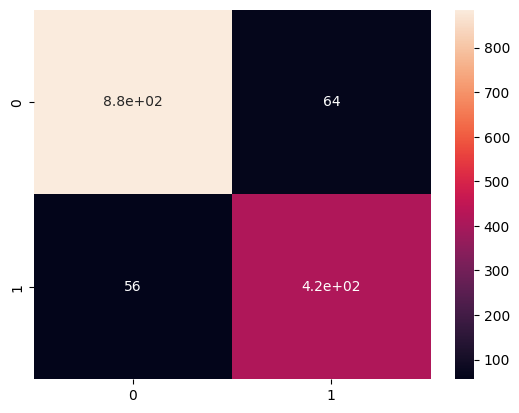

In [ ]:
# base StackingClassifier with RandomForestClassifier and LinearSVC
estimators = [
     ('rf', RandomForestClassifier(random_state=42)),
     ('svr', LinearSVC(random_state=42))
]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_classifier.fit(x_train, y_train)
stacking_classifier_prediction = stacking_classifier.predict(x_test)

# print metrics and classification report
print('Accuracy score: ', (accuracy_score(y_test, stacking_classifier_prediction)))
print('Precision score: ', precision_score(y_test, stacking_classifier_prediction))
print('Recall: ', recall_score(y_test, stacking_classifier_prediction))
print('F1-Score: ', f1_score(y_test, stacking_classifier_prediction))
print('Classification report: \n', classification_report(stacking_classifier_prediction, y_test))

# show confusion_matrix
sns.heatmap(confusion_matrix(stacking_classifier_prediction, y_test), annot=True)
plt.show()

In [ ]:
# GridSearch for StackingClassifier
param_grid_for_stacking_classifier = {
    'rf__n_estimators': [50, 150, 300, 500],
    'rf__criterion': ['gini', 'entropy', 'log_loss'],
    'rf__max_depth': [10, 30, 50]
}

# do grid search
grid_search = GridSearchCV(stacking_classifier, param_grid=param_grid_for_stacking_classifier, cv=10, scoring='recall')
grid_search.fit(x_train, y_train)

# print best hyperparameters for StackingClassifier
print(grid_search.best_params_)
print(grid_search.best_score_)

{'rf__criterion': 'entropy', 'rf__max_depth': 30, 'rf__n_estimators': 300}
0.861693684566025


Accuracy score:  0.9126760563380282
Precision score:  0.8768577494692145
Recall:  0.8622129436325678
F1-Score:  0.8694736842105263
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       949
           1       0.86      0.88      0.87       471

    accuracy                           0.91      1420
   macro avg       0.90      0.90      0.90      1420
weighted avg       0.91      0.91      0.91      1420



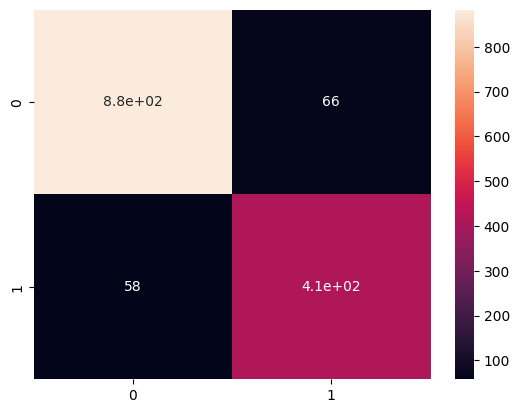

In [ ]:
# build StackingClassifier with grid search best params
estimators = [
     ('rf', RandomForestClassifier(random_state=42, n_estimators=300, criterion='entropy', max_depth=30)),
     ('svr', LinearSVC(random_state=42))
]

grid_stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
grid_stacking_classifier.fit(x_train, y_train)
grid_stacking_classifier_prediction = grid_stacking_classifier.predict(x_test)

# print metrics and classification report
print('Accuracy score: ', (accuracy_score(y_test, grid_stacking_classifier_prediction)))
print('Precision score: ', precision_score(y_test, grid_stacking_classifier_prediction))
print('Recall: ', recall_score(y_test, grid_stacking_classifier_prediction))
print('F1-Score: ', f1_score(y_test, grid_stacking_classifier_prediction))
print('Classification report: \n', classification_report(grid_stacking_classifier_prediction, y_test))

# show confusion_matrix
sns.heatmap(confusion_matrix(grid_stacking_classifier_prediction, y_test), annot=True)
plt.show()

In [ ]:
# check if not fixing imbalancing of data

Accuracy score:  0.9438314944834504
Precision score:  0.0
Recall:  0.0
F1-Score:  0.0
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       995
           1       0.00      0.00      0.00         2

    accuracy                           0.94       997
   macro avg       0.50      0.47      0.49       997
weighted avg       1.00      0.94      0.97       997



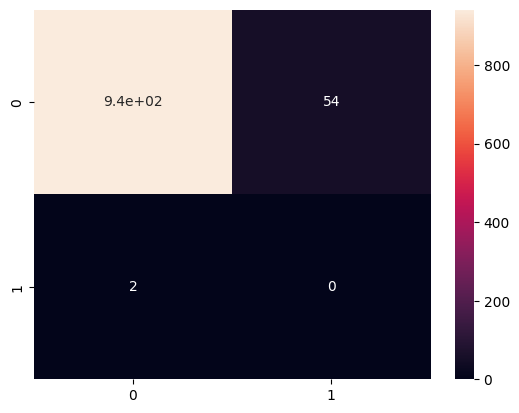

In [ ]:
df = pd.read_csv("data.csv")

# remove outliers
df["bmi"] = df["bmi"].apply(lambda x: np.mean(df["bmi"]) if x > upper_bmi or x < lower_bmi else x)
df["avg_glucose_level"] = df["avg_glucose_level"].apply(lambda x: np.mean(df["avg_glucose_level"]) if x > upper_glu or x < lower_glu else x)


# change gender values to male=1 and female=0
gndr_col = pd.get_dummies(df["gender"])
gndr_col = gndr_col.drop(['Female'], axis=1)

# change ever_married values to Yes=1 and No=1
mrd_col = pd.get_dummies(df["ever_married"])
mrd_col = mrd_col.drop(['No'], axis=1)

# change residence_type values to urban=1 and rural=0
urbn_col = pd.get_dummies(df["Residence_type"])
urbn_col = urbn_col.drop(['Rural'], axis=1)

# build dataset
df = pd.concat((df, gndr_col, mrd_col, urbn_col), axis=1)
df = df.drop(['gender', 'ever_married', 'Residence_type'], axis=1)
df = df.rename(columns={'Male': 'gender', 'Yes': 'ever_married'})
df.head()

# One-Hot Encoding to convert work_type and smoking_status
df = pd.get_dummies(df, drop_first=True)
df.head()

# scaling data
scaler = MinMaxScaler()
columns = ['age', 'avg_glucose_level', 'bmi']
df[columns] = scaler.fit_transform(df[columns])
df.head()

# get target(y) and features(x)
x = df.drop('stroke', axis=1)
y = df.stroke

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# build RandomForestClassifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_train, y_train)
random_forest_classifier_prediction = random_forest_classifier.predict(x_test)

# print metrics and classification report
print('Accuracy score: ', (accuracy_score(y_test, random_forest_classifier_prediction)))
print('Precision score: ', precision_score(y_test, random_forest_classifier_prediction))
print('Recall: ', recall_score(y_test, random_forest_classifier_prediction))
print('F1-Score: ', f1_score(y_test, random_forest_classifier_prediction))
print('Classification report: \n', classification_report(random_forest_classifier_prediction, y_test))

# show confusion_matrix
sns.heatmap(confusion_matrix(random_forest_classifier_prediction, y_test), annot=True)
plt.show()